In [74]:
import numpy as np
import json
import os
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import igraph
import pygraphviz

In [134]:
class LogTransformer():
    def __init__(self,path):
        self.path = path
        self.data = None
        self.loadData()
        
    def loadData(self):
        self.data = []
        for file in os.listdir(self.path):
            if ".json" in file and file != "config.json":
                path = "{}/{}".format(self.path,file)
                with open(path) as json_file:
                    self.data.append(json.load(json_file))
        self.data = sorted(self.data,key = lambda x : x["generation"])
        
    def getPopulationFitness(self):
        res = []
        for gen in self.data:
            for pop in gen["populations"]:
                res.append([gen["generation"],int(pop["goal"]),pop["average"],pop["std"]])
        return res
    
    def getGraphs(self):
        graphs = {}
        bestChromosomes = {}
        count = {}
        indexes = {}
        for element in self.data:
            for pop in element["populations"]:
                goal = pop["goal"]
                if goal not in graphs:
                    bestChromosomes[goal] = []
                    graphs[goal] = nx.OrderedDiGraph()
                    graphs[goal].add_node(0,uuid="none",genes="",fitness=0,color="red")
                if goal not in indexes:
                    indexes[goal] = {}
                    count[goal] = 1
                best = -1
                for i,chromosome in enumerate(pop["chromosomes"]):
                    uuid = chromosome["uuid"]
                    best = i if chromosome["fitness"] > pop["chromosomes"][best]["fitness"] else best
                    if uuid not in indexes[goal]:
                        indexes[goal][uuid] = count[goal]
                        count[goal] += 1
                        index = indexes[goal][uuid]
                        genes = ",".join([f'({gen["identifier"]},{gen["value"]})' for gen in chromosome["genes"]])
                        fitness = chromosome["fitness"]
                        graphs[goal].add_node(index,uuid = chromosome["uuid"], genes = genes,fitness=fitness)
                        if len(chromosome["parents"]) == 0:
                            graphs[goal].add_edge(0, index)
                        else:
                            for parent in chromosome["parents"]:
                                pindex = indexes[goal][parent]
                                graphs[goal].add_edge(pindex, index)
                bestChromosomes[goal].append(indexes[goal][pop["chromosomes"][best]["uuid"]])
        return graphs,bestChromosomes
    

In [135]:
logTrans = LogTransformer("path/28_11_19_08_14_28")

In [46]:
logTrans.getPopulationFitness()

[[0, 0, 11.759999999999998, 6.2374994989979715],
 [0, 5, 10.969999999999999, 4.99970999158951],
 [0, 4, 13.409999999999997, 7.806273118460556],
 [0, 1, 13.009999999999996, 4.319479135266192],
 [0, 2, 13.779999999999992, 7.023930523574383],
 [0, 6, 12.169999999999996, 7.236097014275024],
 [0, 7, 13.499999999999995, 6.107536328176851],
 [0, 3, 12.989999999999995, 7.8586194716374935],
 [1, 0, 12.88571428571428, 6.6726367826109785],
 [1, 5, 11.409523809523806, 5.868227992609232],
 [1, 4, 14.790476190476184, 7.751245968162591],
 [1, 1, 14.914285714285707, 5.190310176462588],
 [1, 2, 14.933333333333326, 7.667701793474408],
 [1, 6, 14.676190476190474, 9.21623333667826],
 [1, 7, 14.580952380952377, 7.453450402497775],
 [1, 3, 14.942857142857138, 7.3337167494077775],
 [2, 0, 14.733333333333324, 6.844763958734704],
 [2, 5, 12.571428571428566, 5.870113396904437],
 [2, 4, 17.304761904761893, 7.363389242311365],
 [2, 1, 15.542857142857134, 4.715988148594844],
 [2, 2, 15.923809523809517, 8.412570229

In [136]:
graphs,bests = logTrans.getGraphs()

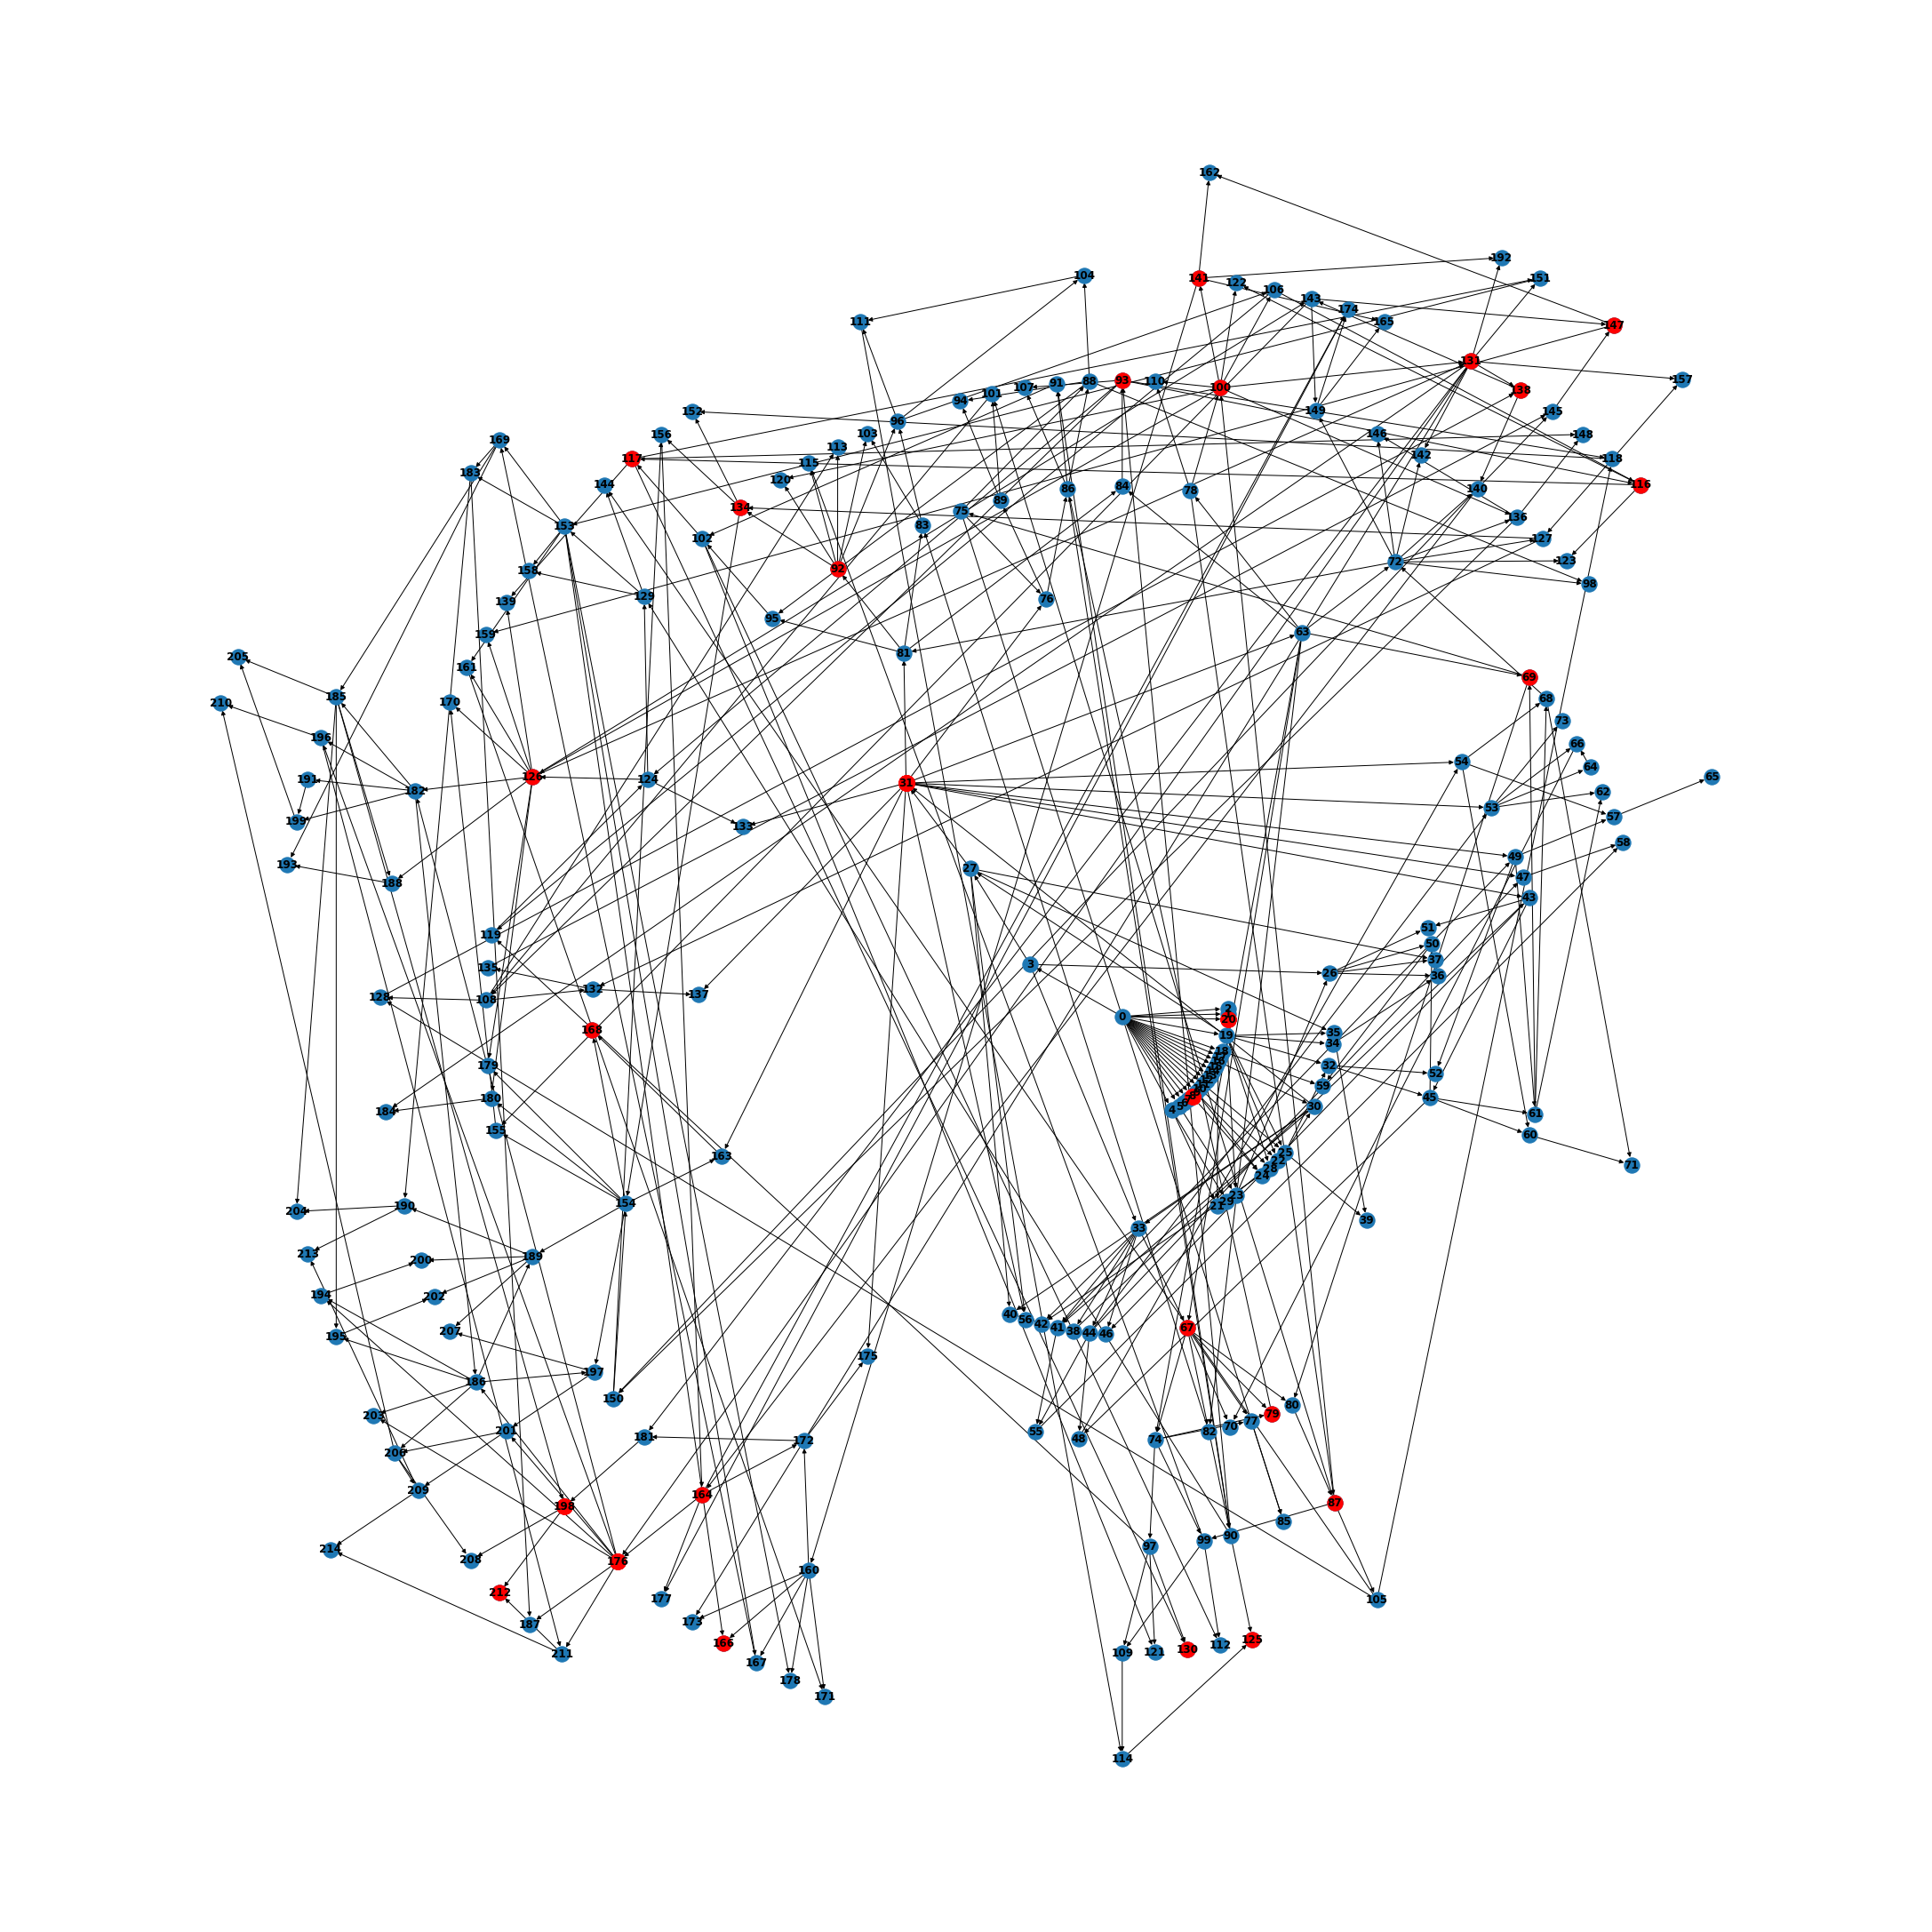

In [139]:
goal = "3"
plt.figure(figsize=(30, 30))
pos = graphviz_layout(graphs["3"],root=0, prog='twopi', args='')
nx.draw(graphs[goal],pos, with_labels=True, font_weight='bold')
nx.draw_networkx_nodes(graphs[goal], pos,
                       nodelist=bests[goal],
                       node_color='r')
plt.axis('equal')
plt.show()

In [8]:
logTrans.data

[{'generation': 0,
  'populations': [{'generation': 0,
    'goal': '0',
    'chromosomes': [{'uuid': 'c8210b47-f019-43b3-8618-65d7a47afc54',
      'generation': 0,
      'genes': [{'identifier': '0', 'value': '0'},
       {'identifier': '1', 'value': '4'},
       {'identifier': '2', 'value': '7'},
       {'identifier': '3', 'value': '4'},
       {'identifier': '4', 'value': '5'}],
      'fitness': '0',
      'parents': []},
     {'uuid': 'd780548b-76f2-41fe-aaa8-60e44ff07a71',
      'generation': 0,
      'genes': [{'identifier': '0', 'value': '7'},
       {'identifier': '1', 'value': '6'},
       {'identifier': '2', 'value': '2'},
       {'identifier': '3', 'value': '4'},
       {'identifier': '4', 'value': '6'}],
      'fitness': '0',
      'parents': []},
     {'uuid': '882d95fb-8891-42db-9ff2-af9da7d1371a',
      'generation': 0,
      'genes': [{'identifier': '0', 'value': '2'},
       {'identifier': '1', 'value': '5'},
       {'identifier': '2', 'value': '0'},
       {'identifier